In [1]:
import h5py, sys, os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm

In [2]:
sys.path.append('/mnt/cbis/home/benedikt/.local/dragonfly/utils/py_src')

In [3]:
import writeemc
import detector
import reademc

In [4]:
path_to_data = "../../data/sparse/" # scratch/sparse on Maxwell
path_to_aux = "../../data/aux/" # scratch/benedikt/aux on Maxwell
path_to_geometry = "../../geometry/"
path_to_recons = "../../data/recons/"

In [5]:
emc_folder = path_to_recons + "template_0000/"
emc_output = emc_folder + "data/output_001.h5"
emc_photons = emc_folder + 'photons.txt'

In [14]:
with h5py.File(emc_output,'r') as f:
    likelihood = f['likelihood'][:]
    orientations = f['orientations'][:]
    volume = f['intens'][0]
    scale = f['scale'][:]
    prob = f['probabilities/prob'][:]
    numrot = f['probabilities/num_rot'][:]
    place = f['probabilities/place'][:]
    blacklist = (scale == 1)
    weights = f['inter_weight'][0]

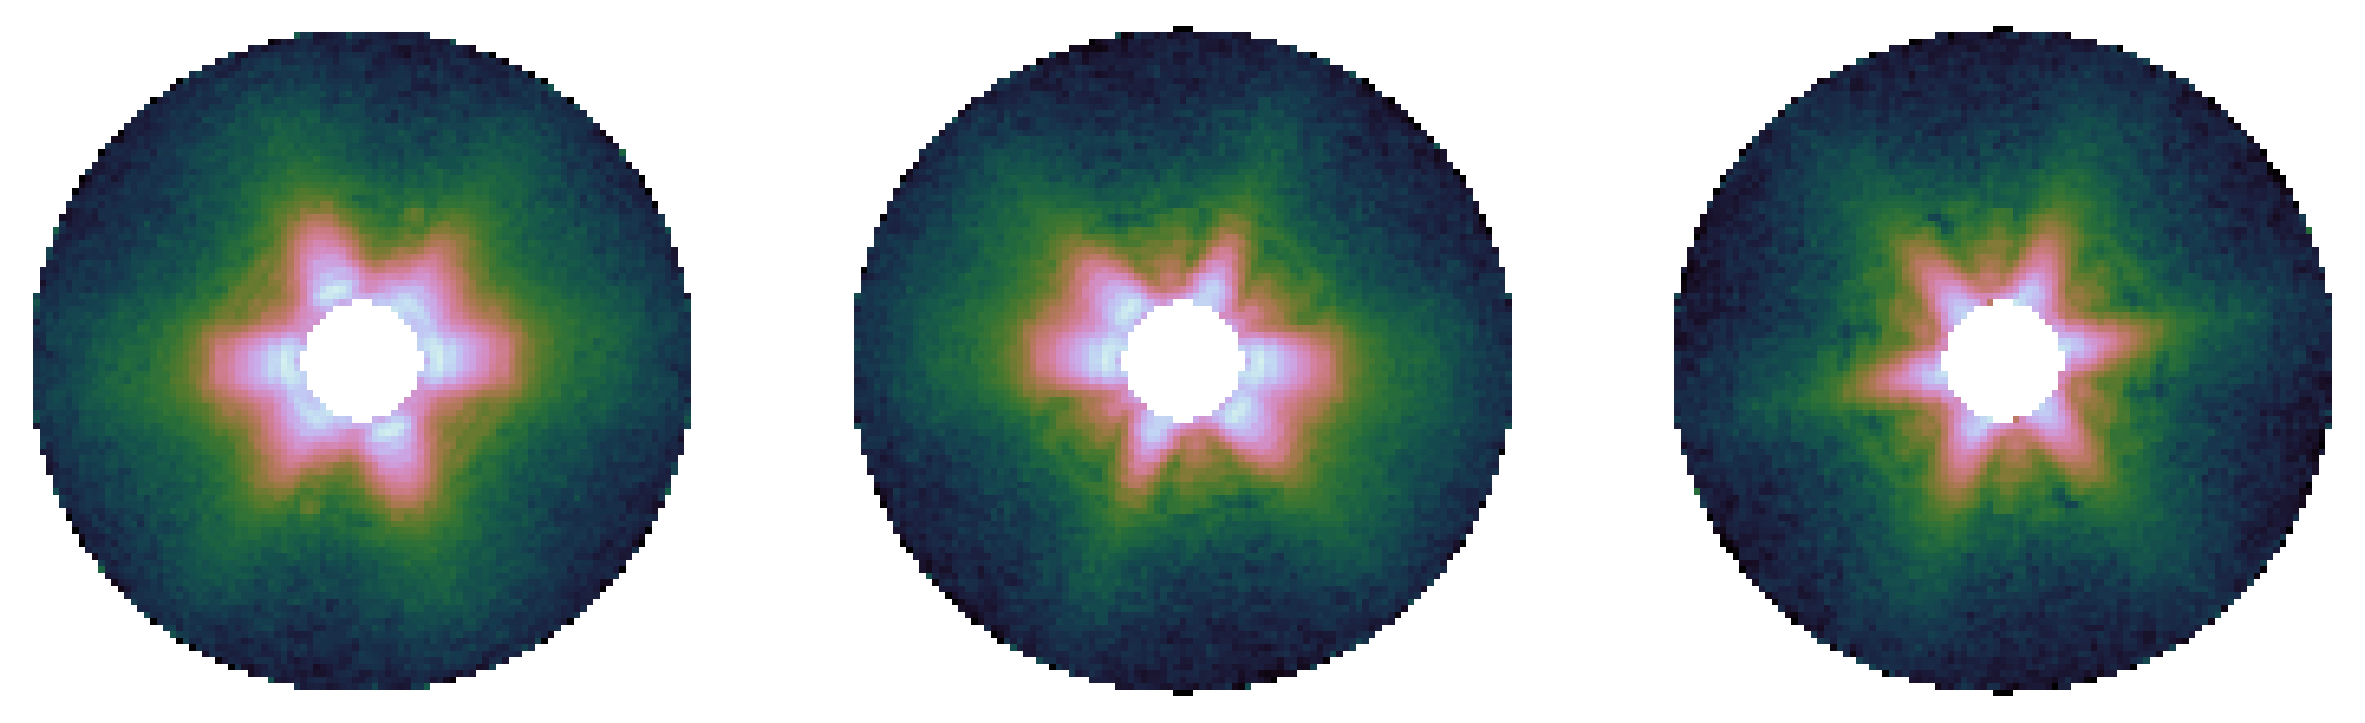

In [15]:
nx,ny,nz = volume.shape
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5), dpi=200)
[ax.axis('off') for ax in axes]
axes[0].imshow(volume[nx//2],     norm=colors.LogNorm(vmin=0.001, vmax=10), cmap='cubehelix')
axes[1].imshow(volume[:,ny//2],   norm=colors.LogNorm(vmin=0.001, vmax=10), cmap='cubehelix')
axes[2].imshow(volume[:,:,nz//2], norm=colors.LogNorm(vmin=0.001, vmax=10), cmap='cubehelix')
plt.show()

In [9]:
likelihood = likelihood[~blacklist]

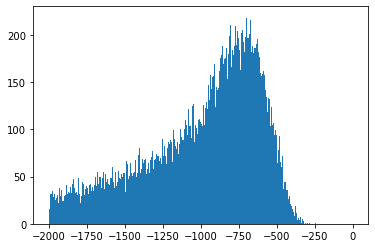

In [16]:
plt.figure()
plt.hist(likelihood[~blacklist], bins=1000, range=(-2000,0))
plt.show()

In [25]:
cut = 0.9
min_likelihood = np.sort(likelihood[~blacklist])[int(np.ceil(cut*len(likelihood[~blacklist])))]
bad = (likelihood < min_likelihood) | (likelihood == 0)

In [27]:
blacklist = np.zeros(likelihood.shape[0], dtype=int)
blacklist[bad] = 1
ndata = blacklist.shape[0] - blacklist.sum()

In [28]:
np.savetxt(emc_folder + "data/blacklist_%d.dat" %(ndata), blacklist, fmt='%d')